# ICMR _ CANCER-CLASSIFICATION

ICMR wants to analyze different types of cancers, such as breast cancer, renal cancer, colon cancer, lung cancer, and prostate cancer becoming a cause of worry in recent years. They would like to identify the probable cause of these cancers in terms of genes responsible for each cancer type. This would lead us to early identification of each type of cancer reducing the fatality rate.

#### DATASET-DETAILS

The input dataset contains 802 samples for the corresponding 802 people who have been detected with different types of cancer.
Each sample contains expression values of more than 20K genes.
Samples have one of the types of tumours: BRCA, KIRC, COAD, LUAD, and PRAD.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
dfa=pd.read_csv("F:/HEALTHCARE-ANALYST/DATASET/ICMR_CANCER/data.csv")

In [7]:
labels=pd.read_csv("F:/HEALTHCARE-ANALYST/DATASET/ICMR_CANCER/labels.csv")

In [8]:
dfa

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [9]:
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [10]:
df = pd.merge(dfa,labels)
df.sample(10)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
580,sample_580,0.0,5.076465,4.395440,6.248165,9.642377,0.0,9.739269,0.541118,0.0,...,8.197733,10.137465,7.917241,9.729250,11.664269,9.575114,9.656275,3.049805,0.000000,LUAD
46,sample_46,0.0,1.149259,2.575385,7.397529,10.284535,0.0,6.313835,0.000000,0.0,...,7.960083,9.434808,5.604697,10.121495,13.375773,10.090298,8.753935,7.457438,0.000000,PRAD
59,sample_59,0.0,1.870306,3.768777,5.713107,10.292172,0.0,6.845653,0.000000,0.0,...,9.157509,10.062249,6.274878,9.777145,11.995022,9.220477,9.940356,8.079095,0.000000,BRCA
578,sample_578,0.0,3.068963,3.838074,7.825665,10.412961,0.0,7.541283,0.566766,0.0,...,7.679776,9.558666,7.324523,9.453666,12.582457,9.148248,9.075476,3.948321,0.566766,BRCA
259,sample_259,0.0,3.536675,2.905216,6.392316,9.791599,0.0,7.133831,0.617581,0.0,...,8.742842,10.006915,5.624993,10.046810,12.101828,10.508379,10.172002,5.424230,0.000000,BRCA
107,sample_107,0.0,4.185930,4.003944,7.827019,10.202038,0.0,7.442098,1.078542,0.0,...,9.139984,10.494966,0.000000,8.712953,12.019473,10.179387,8.642449,3.842235,0.000000,COAD
238,sample_238,0.0,1.057138,3.111282,6.058336,10.630304,0.0,7.091541,0.000000,0.0,...,8.697381,10.283100,7.797467,10.641998,12.348250,10.073646,10.250239,5.998922,0.000000,BRCA
170,sample_170,0.0,0.825704,2.842959,7.206262,9.232987,0.0,7.214591,1.397639,0.0,...,8.607508,10.044066,3.683831,10.273353,12.265785,10.040714,9.580466,5.056774,0.000000,KIRC
378,sample_378,0.0,2.730444,2.926853,6.315613,10.185111,0.0,5.699252,0.000000,0.0,...,9.162182,10.361856,5.421142,9.921479,11.227435,10.240481,9.689989,5.362452,0.000000,BRCA
551,sample_551,0.0,1.433227,2.441590,7.395508,9.964325,0.0,8.894878,0.639232,0.0,...,8.806021,9.460681,8.142388,9.625550,11.751410,10.027339,9.108119,5.240211,0.000000,BRCA


In [21]:
df.shape

(801, 20533)

In [22]:
df.rename(columns={'Unnamed: 0':'SAMPLE_NO'},inplace=True)

In [23]:
df.columns

Index(['SAMPLE_NO', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5',
       'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'Class'],
      dtype='object', length=20533)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20533 entries, SAMPLE_NO to Class
dtypes: float64(20531), object(2)
memory usage: 125.5+ MB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gene_0,801.0,0.026642,0.136850,0.000000,0.000000,0.000000,0.000000,1.482332
gene_1,801.0,3.010909,1.200828,0.000000,2.299039,3.143687,3.883484,6.237034
gene_2,801.0,3.095350,1.065601,0.000000,2.390365,3.127006,3.802534,6.063484
gene_3,801.0,6.722305,0.638819,5.009284,6.303346,6.655893,7.038447,10.129528
gene_4,801.0,9.813612,0.506537,8.435999,9.464466,9.791599,10.142324,11.355621
...,...,...,...,...,...,...,...,...
gene_20526,801.0,11.742228,0.670371,9.045255,11.315857,11.749802,12.177852,13.715361
gene_20527,801.0,10.155271,0.580569,7.530141,9.836525,10.191207,10.578561,11.675653
gene_20528,801.0,9.590726,0.563849,7.864533,9.244219,9.566511,9.917888,12.813320
gene_20529,801.0,5.528177,2.073859,0.593975,4.092385,5.218618,6.876382,11.205836


In [26]:
df.dtypes

SAMPLE_NO      object
gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
               ...   
gene_20527    float64
gene_20528    float64
gene_20529    float64
gene_20530    float64
Class          object
Length: 20533, dtype: object

In [27]:
df.isna().sum()

SAMPLE_NO     0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20533, dtype: int64

In [28]:
df.duplicated().sum()

0

In [29]:
df1=df.sort_values(by="SAMPLE_NO")

In [30]:
df1

,SAMPLE_NO,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.00000,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
1,sample_1,0.00000,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
10,sample_10,0.00000,3.492071,3.553373,7.151707,10.253446,0.0,8.301258,0.000000,0.0,...,9.061674,10.042261,6.580103,9.785004,12.383834,9.869359,8.991768,5.735121,0.892818,BRCA
100,sample_100,0.00000,3.882839,3.590722,5.892908,9.277211,0.0,7.450114,1.047329,0.0,...,8.819965,10.589398,5.961931,9.692907,12.015858,9.772920,9.649495,5.112700,0.000000,BRCA
101,sample_101,0.00000,4.814166,3.928105,5.854978,8.846054,0.0,8.960601,2.263846,0.0,...,8.829567,9.903676,5.870767,10.341775,11.360907,10.776088,9.783543,4.544801,0.000000,KIRC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sample_95,0.00000,4.447612,5.114288,6.688362,9.608682,0.0,7.577912,0.444349,0.0,...,8.689526,10.021924,6.756410,9.705961,10.796575,10.500145,9.762166,4.846508,0.000000,PRAD
96,sample_96,0.54409,2.231647,3.833133,7.077296,10.795228,0.0,7.009056,0.544090,0.0,...,7.891006,9.594944,0.000000,9.228138,12.161283,9.853244,9.626222,2.976602,0.000000,COAD
97,sample_97,0.00000,2.517704,3.030407,5.901779,9.736554,0.0,6.648996,0.402176,0.0,...,9.405503,10.299025,5.259235,9.395206,11.307633,10.276764,9.890615,8.811314,0.000000,BRCA
98,sample_98,0.00000,2.987194,2.677305,7.134118,9.689577,0.0,6.186092,0.000000,0.0,...,9.332312,10.051970,4.380487,10.398605,11.414030,10.735708,9.971084,5.756348,0.000000,PRAD


In [31]:
df1['SAMPLE_NO'].value_counts()

SAMPLE_NO
sample_0      1
sample_583    1
sample_574    1
sample_575    1
sample_576    1
             ..
sample_341    1
sample_342    1
sample_343    1
sample_344    1
sample_99     1
Name: count, Length: 801, dtype: int64

In [32]:
df1["Class"].value_counts()

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Class'>

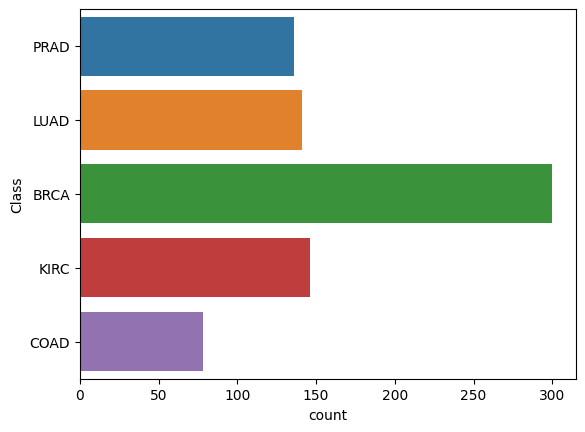

In [33]:
sns.countplot(df1,y="Class")

In [37]:
df1=df1.drop(['SAMPLE_NO'],axis=1)

# HIRARCALLY CLUSTERED HEATMAP

In [38]:
from scipy.cluster import hierarchy

In [39]:
data=df1.values

In [40]:
heatmap_data = pd.pivot_table(df1, index=['Class'])
                             
heatmap_data

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


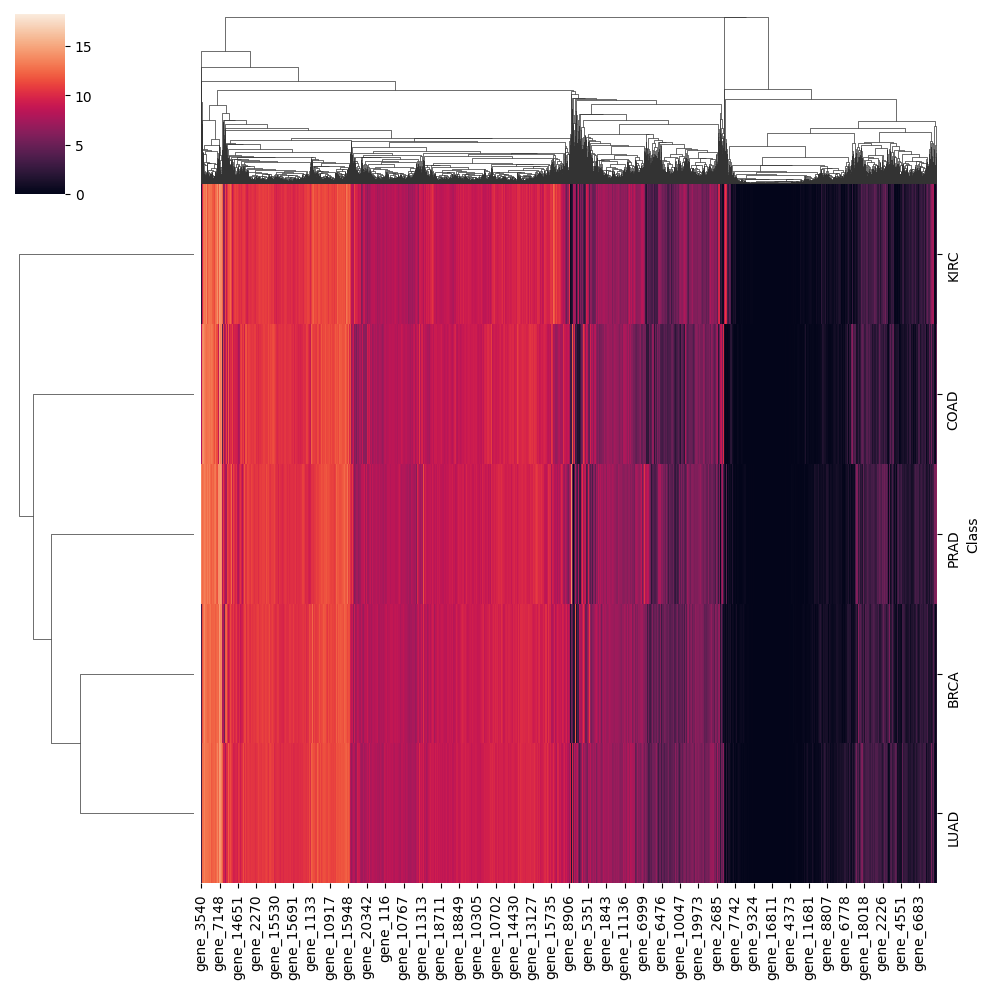

In [41]:
sns.clustermap(heatmap_data)

In [42]:
hm=df1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
hm['Class']=encoder.fit_transform(hm['Class'])

In [43]:
hm

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.00000,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,4
1,0.00000,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,3
10,0.00000,3.492071,3.553373,7.151707,10.253446,0.0,8.301258,0.000000,0.0,0.0,...,9.061674,10.042261,6.580103,9.785004,12.383834,9.869359,8.991768,5.735121,0.892818,0
100,0.00000,3.882839,3.590722,5.892908,9.277211,0.0,7.450114,1.047329,0.0,0.0,...,8.819965,10.589398,5.961931,9.692907,12.015858,9.772920,9.649495,5.112700,0.000000,0
101,0.00000,4.814166,3.928105,5.854978,8.846054,0.0,8.960601,2.263846,0.0,0.0,...,8.829567,9.903676,5.870767,10.341775,11.360907,10.776088,9.783543,4.544801,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00000,4.447612,5.114288,6.688362,9.608682,0.0,7.577912,0.444349,0.0,0.0,...,8.689526,10.021924,6.756410,9.705961,10.796575,10.500145,9.762166,4.846508,0.000000,4
96,0.54409,2.231647,3.833133,7.077296,10.795228,0.0,7.009056,0.544090,0.0,0.0,...,7.891006,9.594944,0.000000,9.228138,12.161283,9.853244,9.626222,2.976602,0.000000,1
97,0.00000,2.517704,3.030407,5.901779,9.736554,0.0,6.648996,0.402176,0.0,0.0,...,9.405503,10.299025,5.259235,9.395206,11.307633,10.276764,9.890615,8.811314,0.000000,0
98,0.00000,2.987194,2.677305,7.134118,9.689577,0.0,6.186092,0.000000,0.0,0.0,...,9.332312,10.051970,4.380487,10.398605,11.414030,10.735708,9.971084,5.756348,0.000000,4


In [85]:
target_columns=hm['Class']
c1=pd.DataFrame({'CLASS':target_columns})
c1

,CLASS
0,4
1,3
10,0
100,0
101,2
...,...
95,4
96,1
97,0
98,4


In [240]:
selected_columns=hm.sample(n=10000,axis=1,random_state=42).columns.tolist()
c2=hm[selected_columns]

In [241]:
hm1=pd.concat([c2,c1],axis=1)
hm1.sample(10)

,gene_1272,gene_3222,gene_6423,gene_16755,gene_12457,gene_6956,gene_5921,gene_17785,gene_11076,gene_14360,...,gene_5794,gene_8953,gene_8751,gene_8988,gene_11331,gene_13039,gene_6973,gene_16367,gene_8494,CLASS
25,10.661734,10.640606,9.801290,0.0,0.0,8.520359,6.872435,3.431743,0.338681,11.683043,...,9.476339,9.189068,0.612777,10.763187,8.798145,3.395927,8.722944,6.194585,9.391209,3
51,11.133945,7.248497,10.785117,0.0,0.0,6.800188,6.871080,2.025135,1.155814,11.639820,...,8.882603,8.514730,0.000000,13.411312,9.463412,2.706332,8.102621,2.563768,9.709494,3
47,11.362925,0.000000,10.595575,0.0,0.0,3.823780,7.018801,0.000000,0.000000,11.801858,...,10.444052,8.850534,0.000000,9.700946,9.583500,1.300007,9.480954,8.178894,9.540820,1
671,11.254332,3.745528,10.390126,0.0,0.0,8.341603,6.884415,5.422667,0.472904,10.982915,...,6.836252,9.061666,0.000000,13.744340,9.064260,1.734395,9.191765,5.559486,9.161711,0
638,11.467142,3.782891,11.296996,0.0,0.0,7.899369,7.015995,5.123716,0.333996,11.406965,...,7.241354,8.811609,0.000000,13.087219,9.139441,2.216300,9.303630,6.330073,9.359532,0
400,12.533021,5.450353,10.820203,0.0,0.0,7.379127,7.747569,1.283151,0.363676,11.878767,...,8.860910,8.013970,0.000000,12.393755,9.720137,0.363676,8.770968,4.632227,9.495112,1
367,10.614379,5.706895,10.490771,0.0,0.0,8.311144,6.632738,3.366686,0.885028,11.208356,...,7.249436,7.819113,0.000000,13.675990,9.098172,3.366686,10.171314,9.568596,9.633644,0
58,7.962364,2.981889,9.967990,0.0,0.0,8.557460,6.431488,3.825094,4.353754,10.644965,...,6.707401,8.370496,0.000000,3.194528,8.365019,1.172872,9.729792,6.420964,10.236875,2
294,11.529313,4.691942,11.821447,0.0,0.0,8.054702,6.895121,3.874404,0.000000,11.685664,...,8.196578,9.353301,0.000000,13.092427,9.316949,6.661308,10.313280,9.990459,9.230724,0
151,10.735158,10.259696,11.327822,0.0,0.0,8.012932,7.131950,2.493724,2.252113,12.587480,...,8.660317,8.855096,3.749459,7.083490,9.066175,3.186897,9.917560,6.849999,8.085334,3


In [242]:
data=hm1.values
clustered_data=hierarchy.linkage(data,method='ward')

In [243]:
clustered_data

array([[4.44000000e+02, 5.18000000e+02, 6.88101042e+01, 2.00000000e+00],
       [3.04000000e+02, 3.50000000e+02, 7.03801209e+01, 2.00000000e+00],
       [6.52000000e+02, 8.01000000e+02, 7.26253404e+01, 3.00000000e+00],
       ...,
       [1.59600000e+03, 1.59700000e+03, 1.54496205e+03, 5.19000000e+02],
       [1.59100000e+03, 1.59800000e+03, 1.63372419e+03, 6.55000000e+02],
       [1.59400000e+03, 1.59900000e+03, 2.01838900e+03, 8.01000000e+02]])

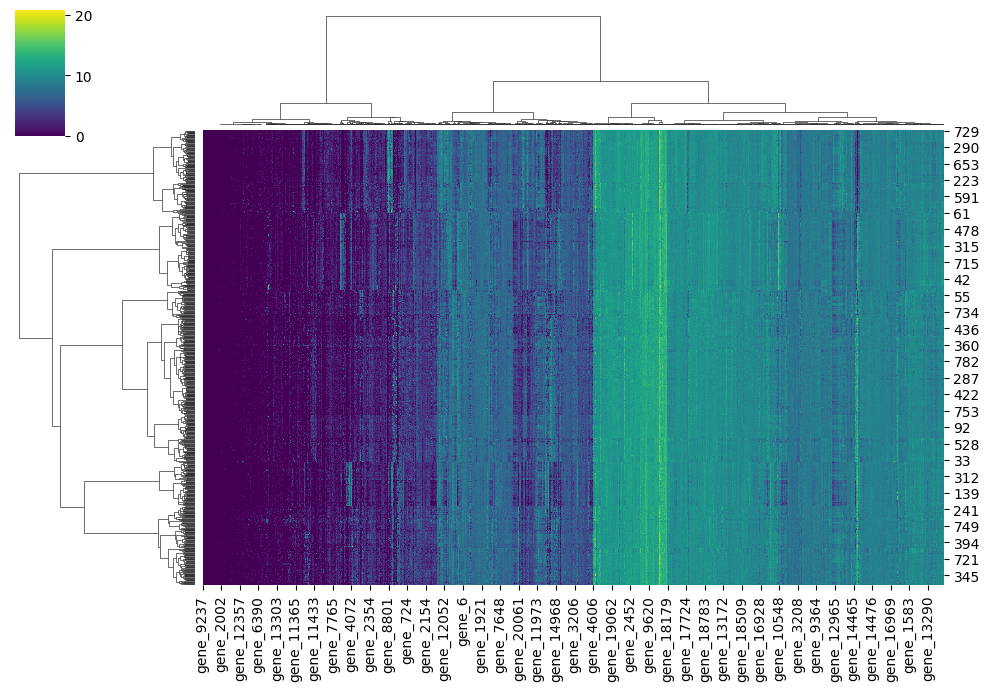

In [244]:
sns.clustermap(hm1,method='ward',cmap='viridis',figsize=(10,7))
plt.show()

In [245]:
df=hm1

In [246]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [247]:
# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
df_standardized = StandardScaler().fit_transform(df)

In [248]:
num_components = 10  # Adjust as needed

In [249]:

pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(df_standardized)

In [250]:
df_reduced = pd.DataFrame(data=pca_result, columns=[f'GENE{i+1}' for i in range(num_components)])

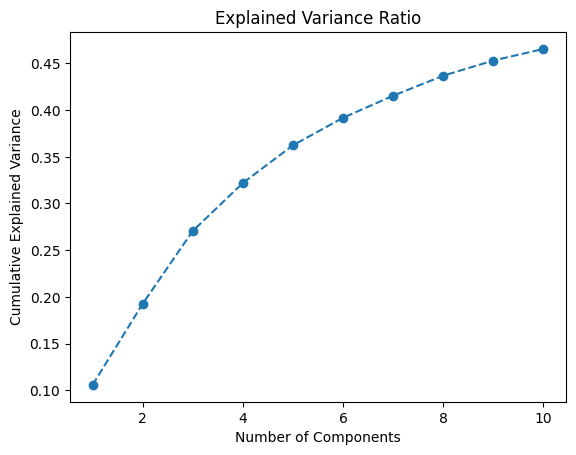

In [251]:
# Optional: Plot the explained variance ratio
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# df_reduced now contains the reduced dataset with a smaller number of genes

In [252]:
df2=df_reduced
df2

,GENE1,GENE2,GENE3,GENE4,GENE5,GENE6,GENE7,GENE8,GENE9,GENE10
0,-39.732810,66.014643,53.017842,8.383233,5.954551,25.921585,-5.174415,-13.719227,0.120039,1.841117
1,-10.768500,2.823043,-45.884394,0.967278,-18.525259,19.977279,-9.997511,11.229093,-15.390135,-19.076582
2,-13.216902,-10.707769,14.800152,25.329916,11.148610,-7.628444,-3.671069,-16.310305,3.019842,1.579118
3,-16.084666,-21.598954,7.617977,21.776915,15.260837,-17.410067,-5.100841,6.004228,-12.739625,-0.015657
4,68.349544,8.243645,1.046117,-22.725353,11.728638,-29.608689,9.239483,13.468092,-5.666227,4.210716
...,...,...,...,...,...,...,...,...,...,...
796,-21.076986,7.773039,63.611960,-31.707179,-9.509506,5.346351,-0.619805,5.623176,-6.690296,-3.001858
797,-43.848494,19.293257,-49.824421,-29.384749,11.031907,13.025167,-4.426124,-8.518524,27.956727,-15.518390
798,-6.855624,-41.576377,8.093591,13.654038,22.628931,-7.114999,-21.939546,0.161130,-2.906870,3.872630
799,11.582823,-20.208504,44.953586,-32.156573,-19.510193,22.511366,-2.622922,-18.619267,5.337443,6.781050


In [253]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5)
kmeans.fit(df2)
labels=kmeans.labels_

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [254]:
df['Class']=labels
df['Class']

0      3
1      0
10     1
100    1
101    2
      ..
95     3
96     4
97     1
98     3
99     1
Name: Class, Length: 801, dtype: int32

In [255]:
centers=kmeans.cluster_centers_
centers

array([[-7.31924186e+00,  1.20067794e+01, -1.71324492e+01,
         1.44219688e+01, -1.88762137e+01,  5.11381111e+00,
        -2.38339342e+00,  6.15988118e+00, -2.90633702e+00,
         2.67422952e+00],
       [-5.93266358e+00, -3.10005594e+01,  1.57846382e+00,
         1.36813563e+01,  9.34708167e+00, -2.87706409e+00,
         2.99011400e-01, -2.10910853e+00,  6.44083770e-01,
         4.64815083e-02],
       [ 5.55906946e+01,  2.09570499e+01, -6.00581242e+00,
        -8.32165073e+00,  1.48591641e+01, -1.27058026e+00,
         2.66713662e+00,  2.55248449e+00, -2.36708761e+00,
        -7.04593391e-01],
       [-1.51460542e+01,  1.05959161e+01,  4.95465257e+01,
        -1.72846778e+01, -9.50764219e+00,  7.77562905e+00,
         3.79176281e+00, -5.96362350e-01,  3.61995466e-01,
        -3.11044782e+00],
       [-4.15809230e+01,  1.54267499e+01, -3.88503853e+01,
        -3.81721266e+01,  5.91315451e+00, -1.53768844e+01,
        -6.89931617e+00, -1.30273886e+01,  9.51846001e+00,
        -2.

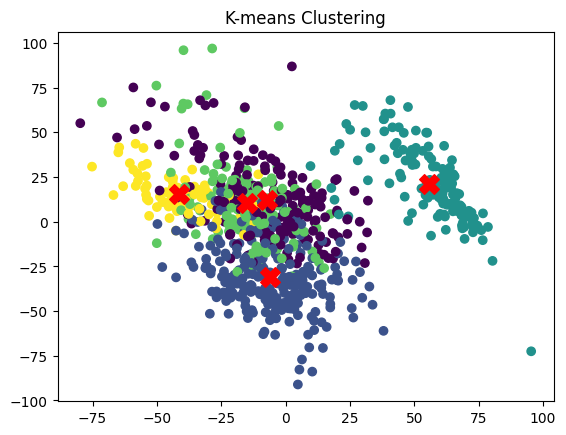

In [256]:
plt.scatter(df2.iloc[:, 0],df2.iloc[:, 1],c=labels,cmap="viridis")
plt.scatter(centers[:, 0],centers[:, 1],marker='X',s=200,c='red')
plt.title("K-means Clustering")
plt.show()

In [257]:
df3=pd.concat([df2,df['Class']],axis=1)

In [258]:
df3

,GENE1,GENE2,GENE3,GENE4,GENE5,GENE6,GENE7,GENE8,GENE9,GENE10,Class
0,-39.732810,66.014643,53.017842,8.383233,5.954551,25.921585,-5.174415,-13.719227,0.120039,1.841117,3
1,-10.768500,2.823043,-45.884394,0.967278,-18.525259,19.977279,-9.997511,11.229093,-15.390135,-19.076582,0
2,-13.216902,-10.707769,14.800152,25.329916,11.148610,-7.628444,-3.671069,-16.310305,3.019842,1.579118,3
3,-16.084666,-21.598954,7.617977,21.776915,15.260837,-17.410067,-5.100841,6.004228,-12.739625,-0.015657,3
4,68.349544,8.243645,1.046117,-22.725353,11.728638,-29.608689,9.239483,13.468092,-5.666227,4.210716,1
...,...,...,...,...,...,...,...,...,...,...,...
796,-21.076986,7.773039,63.611960,-31.707179,-9.509506,5.346351,-0.619805,5.623176,-6.690296,-3.001858,1
797,-43.848494,19.293257,-49.824421,-29.384749,11.031907,13.025167,-4.426124,-8.518524,27.956727,-15.518390,0
798,-6.855624,-41.576377,8.093591,13.654038,22.628931,-7.114999,-21.939546,0.161130,-2.906870,3.872630,0
799,11.582823,-20.208504,44.953586,-32.156573,-19.510193,22.511366,-2.622922,-18.619267,5.337443,6.781050,3


In [259]:
df3.shape

(801, 11)

In [260]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
GENE1,801.0,-4.257934e-16,32.301538,-79.777157,-20.413636,-5.410424,13.412778,95.401790
GENE2,801.0,1.064483e-16,29.294677,-91.053024,-21.282487,3.234800,18.180954,96.826614
GENE3,801.0,3.193450e-16,27.752484,-52.681774,-18.755707,-2.967754,11.812801,70.598344
GENE4,801.0,3.548278e-16,22.513944,-62.540384,-16.051548,3.401212,15.070981,63.681317
GENE5,801.0,2.838623e-16,19.969782,-50.247633,-13.214487,1.911655,14.809438,60.289775
GENE6,801.0,-3.193450e-16,17.045760,-45.153332,-11.503916,-0.259648,9.707348,92.017399
GENE7,801.0,1.596725e-16,15.291801,-43.361386,-9.357939,-1.639136,6.158322,71.007432
GENE8,801.0,3.548278e-17,14.534306,-46.076702,-9.888782,-0.101686,10.247012,46.186669
GENE9,801.0,0.000000e+00,12.663384,-34.220167,-8.071933,-0.687125,7.031306,64.081916
GENE10,801.0,7.096557e-17,11.075885,-35.986994,-7.276249,0.038604,7.291288,36.605861


In [261]:
x=df3.drop(['Class'],axis=1).values
y=df3['Class'].values

In [262]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [263]:
x_train

array([[ 78.60899679,  -2.95664418,   6.79387531, ...,   2.30022033,
          3.33235713,  13.3503664 ],
       [ -0.8060612 ,  -8.61886818, -22.08799698, ...,   7.25160285,
        -16.00944772,   5.81590078],
       [-49.18766824,  43.15057576,  -8.28517214, ...,  18.38722564,
        -12.32356242,  26.36114874],
       ...,
       [ -2.95768079, -20.70986705,  11.21038031, ...,   3.9311041 ,
          0.68373384,  -7.47018215],
       [-38.68356531,  12.02645407, -46.61447842, ...,  -8.17688052,
          0.62400908,  -8.45072881],
       [ -1.0002438 ,  15.83697048,   1.51530457, ...,  23.6038857 ,
         -3.22473486,  -0.8762007 ]])

In [264]:
x_test

array([[-27.27590767,  11.54540038,   8.95615975, ...,  -8.96553614,
         -0.16131771,  10.44371759],
       [ 58.45801392,  30.85015288,  -7.63814434, ...,  16.52183252,
        -13.79971903, -14.95122864],
       [ -5.36374804, -12.86168774,   4.21364503, ..., -20.96202446,
         -2.99244167,   1.61894776],
       ...,
       [-29.1284173 , -28.98654691, -14.65267734, ...,  11.67143972,
         -0.98961618,  -0.52856835],
       [  1.87768955,  -0.47716886, -24.09636299, ...,  12.29607958,
        -11.7880721 , -22.46426187],
       [ 47.60234677,   0.39967181,   0.53684286, ...,   6.91189996,
        -11.90952274,   2.89626439]])

In [265]:
y_train

array([1, 1, 1, 0, 4, 0, 1, 4, 0, 1, 1, 1, 2, 1, 3, 0, 1, 1, 2, 0, 1, 0,
       3, 3, 0, 2, 1, 4, 0, 1, 1, 1, 3, 4, 3, 1, 2, 1, 2, 2, 3, 0, 0, 0,
       2, 2, 4, 0, 4, 0, 2, 1, 0, 3, 0, 3, 3, 2, 2, 3, 0, 4, 1, 1, 4, 2,
       2, 1, 0, 4, 3, 4, 0, 2, 2, 3, 2, 4, 0, 3, 2, 1, 1, 3, 1, 0, 0, 1,
       1, 0, 1, 3, 3, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 4, 0, 1, 2, 4, 0, 1,
       0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1, 3, 4, 1, 2, 4, 1, 0, 3, 2, 1,
       3, 1, 0, 1, 1, 1, 3, 0, 2, 0, 1, 0, 0, 0, 2, 3, 2, 3, 2, 3, 1, 1,
       1, 4, 1, 3, 2, 4, 3, 4, 1, 1, 3, 3, 3, 0, 1, 3, 3, 1, 3, 1, 1, 1,
       3, 4, 0, 0, 3, 0, 1, 1, 0, 1, 2, 4, 0, 1, 0, 1, 0, 3, 4, 2, 1, 0,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 3, 1, 2, 0, 3, 1, 1, 3, 3, 2, 0,
       2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 3, 1, 3, 0, 4,
       2, 4, 1, 3, 1, 4, 1, 1, 1, 1, 3, 1, 3, 0, 2, 3, 0, 0, 0, 0, 3, 0,
       2, 3, 4, 1, 0, 1, 0, 4, 4, 1, 1, 1, 3, 2, 4, 1, 3, 1, 3, 4, 3, 1,
       3, 1, 0, 1, 4, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0,

In [266]:
y_test

array([0, 1, 0, 2, 1, 1, 1, 4, 3, 0, 4, 1, 0, 3, 2, 0, 0, 3, 0, 0, 0, 4,
       2, 1, 0, 1, 4, 1, 3, 3, 1, 3, 3, 4, 0, 1, 0, 0, 0, 1, 4, 1, 1, 1,
       2, 3, 2, 4, 1, 1, 3, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 3, 1, 3, 1,
       0, 3, 2, 1, 1, 0, 1, 0, 1, 0, 3, 3, 2, 1, 2, 1, 0, 0, 0, 1, 1, 3,
       4, 4, 4, 2, 1, 1, 0, 3, 0, 0, 4, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0,
       3, 2, 3, 1, 0, 3, 1, 0, 0, 3, 2, 2, 1, 0, 0, 3, 1, 1, 0, 1, 0, 1,
       3, 2, 4, 1, 3, 0, 3, 1, 1, 2, 3, 0, 3, 4, 2, 1, 3, 2, 1, 3, 1, 2,
       2, 4, 3, 4, 0, 1, 4])

In [267]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [268]:
x_train

array([[ 2.45567292e+00, -9.26892486e-02,  2.63910348e-01, ...,
         1.43294587e-01,  2.56817975e-01,  1.18503852e+00],
       [ 6.51267228e-03, -2.87960241e-01, -7.65803217e-01, ...,
         4.78410702e-01, -1.23304396e+00,  5.08753840e-01],
       [-1.48557600e+00,  1.49739312e+00, -2.73696755e-01, ...,
         1.23208437e+00, -9.49127319e-01,  2.35287089e+00],
       ...,
       [-5.98432723e-02, -7.04937976e-01,  4.21370193e-01, ...,
         2.53674957e-01,  5.27996302e-02, -6.83789179e-01],
       [-1.16162949e+00,  4.24027232e-01, -1.64023582e+00, ...,
        -5.65809450e-01,  4.81991475e-02, -7.71801883e-01],
       [ 5.24081100e-04,  5.55439080e-01,  7.57156277e-02, ...,
         1.58515482e+00, -2.48262177e-01, -9.19212383e-02]])

In [269]:
x_test

array([[-0.99814368,  0.34530697,  0.24844502, ..., -0.61196321,
        -0.01493188,  1.02544004],
       [ 1.73416501,  0.98160941, -0.38217307, ...,  1.28138016,
        -1.22583479, -1.33514041],
       [-0.29981117, -0.45917315,  0.06821959, ..., -1.50312903,
        -0.26629685,  0.20513592],
       ...,
       [-1.05718248, -0.99066338, -0.64873992, ...,  0.92106603,
        -0.08847342,  0.00551413],
       [-0.06902921, -0.05096799, -1.00761962, ...,  0.96746775,
        -1.04722814, -2.03351241],
       [ 1.38819887, -0.02206652, -0.07150654, ...,  0.56750097,
        -1.0580113 ,  0.32386855]])

# 1. SUPPORT VECTOR MACHINE

In [270]:
from sklearn.svm import SVC
model1=SVC()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

In [271]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1])

In [272]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.32298136645962733
Confusion Matrix:
[[10 29  0  1  0]
 [10 41  0  1  0]
 [ 5 19  0  0  0]
 [ 6 22  0  1  0]
 [ 3 12  1  0  0]]


In [274]:

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.25      0.27        40
           1       0.33      0.79      0.47        52
           2       0.00      0.00      0.00        24
           3       0.33      0.03      0.06        29
           4       0.00      0.00      0.00        16

    accuracy                           0.32       161
   macro avg       0.19      0.21      0.16       161
weighted avg       0.24      0.32      0.23       161



C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# RANDOM_FOREST_CLASSIFIER

In [275]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

In [276]:
y_pred

array([0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       2, 1, 0, 3, 1, 1, 3, 1, 1, 1, 2, 0, 0, 4, 1, 1, 2, 0, 0, 0, 0, 1,
       1, 1, 2, 3, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 0, 0, 1, 2, 1, 3, 3, 3, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 2,
       1, 0, 3, 1, 2, 1, 1])

In [277]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.3167701863354037
Confusion Matrix:
[[12 20  6  2  0]
 [11 32  2  6  1]
 [ 6 12  4  2  0]
 [ 9 12  5  3  0]
 [ 5  7  3  1  0]]


In [278]:

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.30      0.29        40
           1       0.39      0.62      0.47        52
           2       0.20      0.17      0.18        24
           3       0.21      0.10      0.14        29
           4       0.00      0.00      0.00        16

    accuracy                           0.32       161
   macro avg       0.22      0.24      0.22       161
weighted avg       0.26      0.32      0.28       161

